In [5]:
!pip install seaborn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

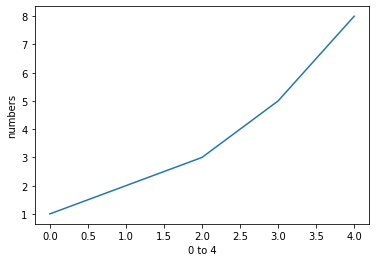

In [10]:
plt.plot([1, 2, 3, 5, 8])
plt.ylabel('numbers')
plt.xlabel('0 to 4')
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

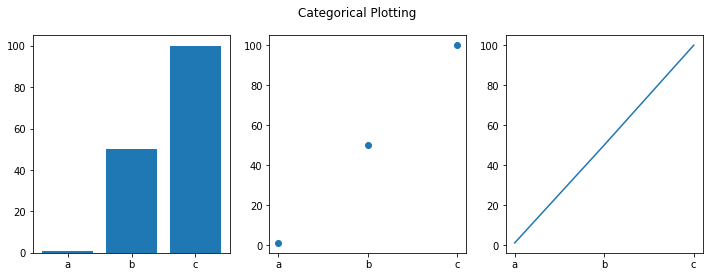

In [15]:
alphabet = ['a', 'b', 'c']
values = [1, 50, 100]
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(alphabet, values)
plt.subplot(1,3,2)
plt.scatter(alphabet, values)
plt.subplot(133)
plt.plot(alphabet, values)
plt.suptitle('Categorical Plotting')

In [18]:
data = pd.read_csv("C:\\Users\\Mgyu\\BIPA_data.csv",index_col = 0)

In [20]:
data1_10 = data[data['championId'].isin(range(0,10))]
group1_10 = data1_10.groupby('championId', as_index = False).mean()

<BarContainer object of 9 artists>

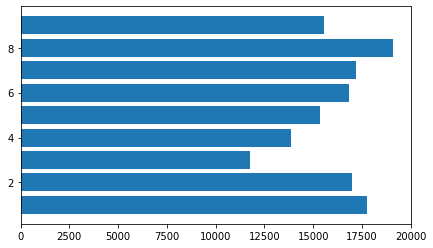

In [23]:
#figure는 켄버스, ax는 그림의 여러 부분
fig, ax = plt.subplots(figsize = (7, 4))
ax.barh(group1_10['championId'], group1_10['totalDamageDealtToChampions'])

In [24]:
#champion index 불러오기
import requests
champ_ver = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()['n']['champion']
championJsonURL = 'http://ddragon.leagueoflegends.com/cdn/'+champ_ver+'/data/en_US/champion.json'
request = requests.get(championJsonURL)
champion_data=request.json()
champion_data.keys()
champion_dict = {}
for c_name in champion_data['data'].keys() :
    champion_dict[int(champion_data['data'][c_name]['key'])]=c_name
champion_dict.keys()
champion = pd.DataFrame.from_dict(champion_dict, orient = 'index', columns = ['champion'])

In [25]:
#champion, data merge
group1_10 = pd.merge(group1_10, champion, left_on = 'championId', right_index = True)

In [27]:
group1_10

,championId,gameId,teamId,summonerId,level,championsKilled,numDeaths,assists,neutralMinionsKilled,turretsKilled,...,totalDamageDealt,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,gameLength,champion
0,1,5.384407e+09,149.863574,4.828111e+07,13.522510,5.843793,5.648704,7.482265,5.060027,0.684175,...,79020.755116,13873.920873,0.869031,3.095498,23.654843,8224.886085,3825.978854,1956.866985,1644.729195,Annie
1,2,5.384392e+09,148.995149,5.375949e+07,13.733888,6.730423,5.649342,6.315315,98.355509,0.970201,...,140331.489951,30216.665974,8.994456,65.050589,19.574498,26459.150381,18985.893278,1788.160776,1635.169785,Olaf
2,3,5.384396e+09,149.838319,5.641768e+07,12.682498,3.223727,5.536176,10.374091,2.225748,0.415319,...,65968.596200,18422.628335,0.378941,1.060226,28.201091,21981.946443,2720.986661,1188.933508,1622.791027,Galio
3,4,5.384395e+09,150.449371,4.589860e+07,13.651288,4.387358,5.648292,7.768424,8.230677,1.010785,...,108823.763032,17346.380467,1.172858,5.031756,18.112942,8392.594368,5560.650090,3059.980827,1590.137507,TwistedFate
4,5,5.384395e+09,150.382831,4.981885e+07,13.369142,6.084803,5.800812,6.957309,103.541415,0.819374,...,129307.661833,28847.416589,8.319606,69.758121,20.622390,19254.804176,17998.159397,1483.745244,1612.376798,XinZhao
5,6,5.384378e+09,149.351585,4.985643e+07,14.248559,5.936599,5.662824,4.972622,14.265850,1.667867,...,129441.371758,21756.476945,2.865994,6.420029,18.207493,24718.951729,9548.915706,4071.570605,1637.839337,Urgot
6,7,5.384404e+09,149.812433,5.053182e+07,13.759825,6.782422,4.569310,6.266166,5.830922,0.622544,...,79998.176402,18339.237138,1.080475,3.568149,20.033583,8599.405681,3188.190872,1811.963469,1629.338246,Leblanc
7,8,5.384376e+09,150.943732,5.599144e+07,14.145833,5.597578,5.204772,5.246617,6.983796,0.873041,...,116093.556090,23501.713497,1.582265,3.392806,15.436610,11059.194979,5358.603276,2471.168803,1609.393697,Vladimir
8,9,5.384376e+09,150.058343,4.084821e+07,13.368145,5.127771,5.380688,8.717036,98.850350,0.443116,...,120797.366103,24352.407235,6.529463,70.018670,48.835764,13716.184072,13164.863769,725.270128,1647.637106,Fiddlesticks


<BarContainer object of 9 artists>

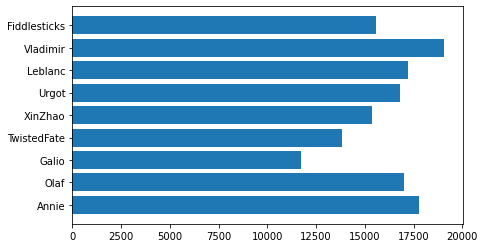

In [29]:
#y축 이름 변경
fig, ax = plt.subplots(figsize =(7,4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])

<AxesSubplot:>

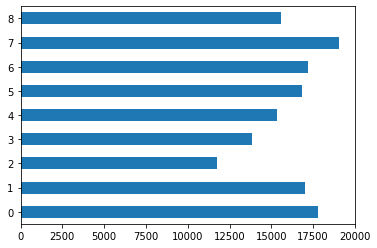

In [30]:
#dataframe에서 바로 그리기
group1_10['totalDamageDealtToChampions'].plot(kind= 'barh')

<AxesSubplot:ylabel='champion'>

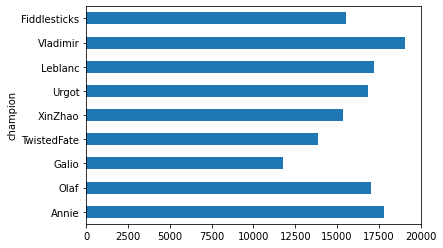

In [31]:
#인덱스 변경(champion으로)
group1_10.index = group1_10.champion
group1_10['totalDamageDealtToChampions'].plot(kind = 'barh')

<BarContainer object of 9 artists>

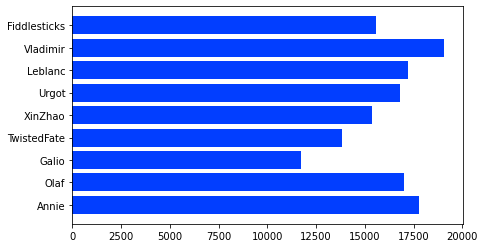

In [33]:
#색상 변경(기본 설정)
sns.set_palette('bright')
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])

<BarContainer object of 9 artists>

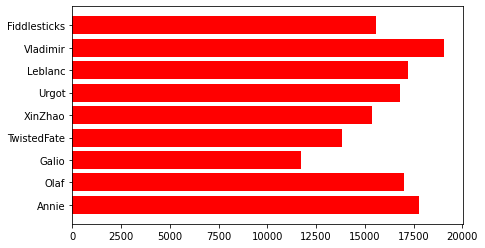

In [36]:
#색상 변경(하나의 그림만)
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'], color='red')

<AxesSubplot:xlabel='totalDamageDealtToChampions', ylabel='champion'>

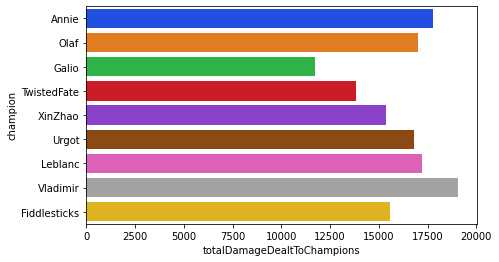

In [37]:
#seaborn 사용
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x ='totalDamageDealtToChampions', y ='champion')

Text(0.5, 1.0, 'Avg Champion Damage')

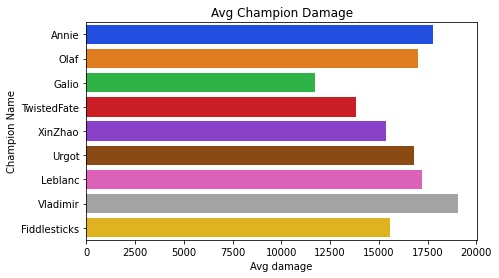

In [39]:
#xlabel, ylabel, title 변경
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x ='totalDamageDealtToChampions', y ='champion')

ax.set_xlabel('Avg damage')
ax.set_ylabel('Champion Name')
ax.set_title('Avg Champion Damage')

Text(0.5, 1.0, 'Avg Champion Damage')

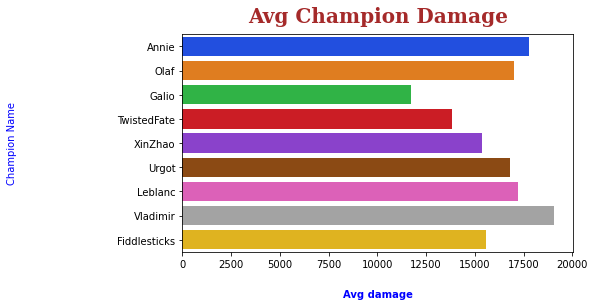

In [42]:
#font 변경
font_label = {'color' : 'blue',
              'weight' : 'bold'}
font_title = {'family':'serif',
              'size': 20, 
              # 'backgroundcolor'='black'
             'color':'brown',
              'weight':'bold', 
              'verticalalignment':'baseline', 
              'horizontalalignment':'center'}
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x ='totalDamageDealtToChampions', y ='champion')
ax.set_xlabel('Avg damage', fontdict = font_label, labelpad= 20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad=100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)

Text(0.5, 1.0, 'Avg Champion Damage')

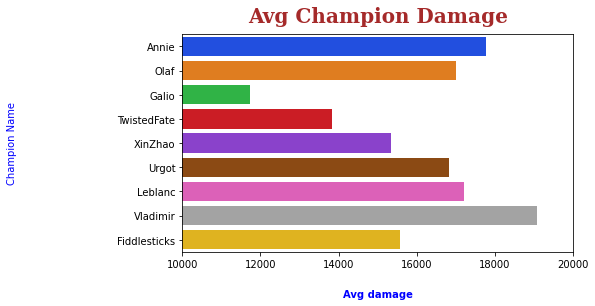

In [48]:
#한계선 설정
font_label = {'color' : 'blue',
              'weight' : 'bold'}
font_title = {'family':'serif',
              'size': 20, 
              # 'backgroundcolor'='black'
             'color':'brown',
              'weight':'bold', 
              'verticalalignment':'baseline', 
              'horizontalalignment':'center'}
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x ='totalDamageDealtToChampions', y ='champion')
###
ax.set_xlim(10000, 20000)
###
ax.set_xlabel('Avg damage', fontdict = font_label, labelpad= 20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad=100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)

Text(0.5, 1.0, 'Avg Champion Damage')

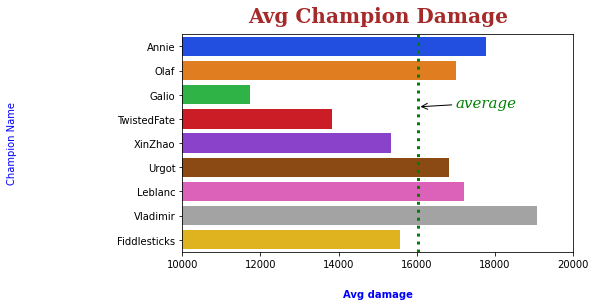

In [54]:
font_label = {'color' : 'blue',
              'weight' : 'bold'}
font_title = {'family':'serif',
              'size': 20, 
              # 'backgroundcolor'='black'
             'color':'brown',
              'weight':'bold', 
              'verticalalignment':'baseline', 
              'horizontalalignment':'center'}
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x ='totalDamageDealtToChampions', y ='champion')

ax.set_xlim(10000, 20000)
###
damage_mean = group1_10['totalDamageDealtToChampions'].mean()
ax.axvline(damage_mean, ls = 'dotted', lw =3, color = 'green')
arrowprops = {'arrowstyle' : '->'}
ax.annotate('average', (damage_mean, 2.5),
           xytext = (17000, 2.5), color='green',
           fontfamily = 'serif', fontstyle = 'italic',
           fontsize = 15, arrowprops = arrowprops)
###
ax.set_xlabel('Avg damage', fontdict = font_label, labelpad= 20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad=100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)

In [55]:
group_data = data[data['gameLength']>200].groupby(['position', 'championId'], as_index = False).mean()

<AxesSubplot:xlabel='position', ylabel='totalDamageDealtToChampions'>

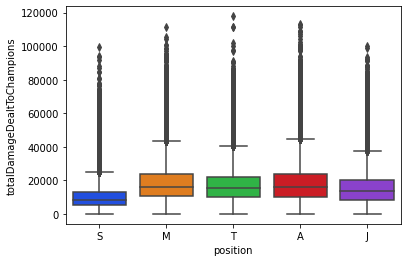

In [56]:
sns.boxplot(y = data['totalDamageDealtToChampions'],
            x = data['position'] )

<AxesSubplot:xlabel='position', ylabel='totalDamageDealtToChampions'>

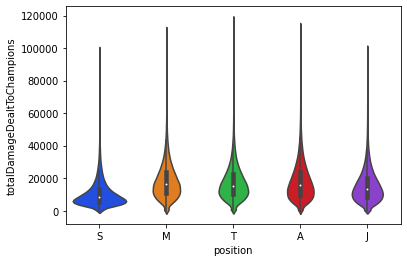

In [57]:
sns.violinplot(y = data['totalDamageDealtToChampions'],
               x = data['position'] )

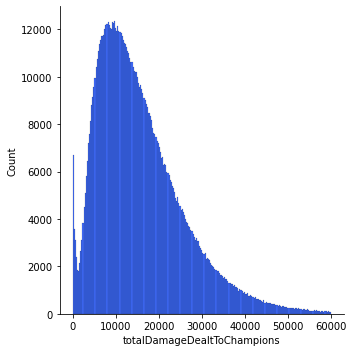

In [59]:
sns.displot(data[data['totalDamageDealtToChampions'] < 60000] 
            ['totalDamageDealtToChampions'])

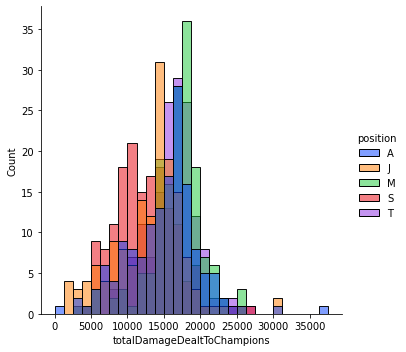

In [63]:
sns.displot(group_data, x ='totalDamageDealtToChampions', hue = 'position')

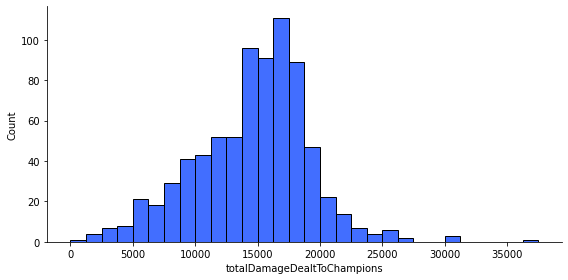

In [64]:
sns.displot(group_data['totalDamageDealtToChampions'], height = 4, aspect = 2)

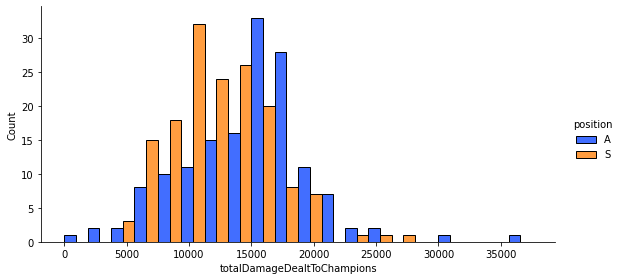

In [67]:
sns.displot(group_data[group_data['position'].isin(['A', 'S'])],
           x ='totalDamageDealtToChampions', hue = 'position',
           multiple = 'dodge', height = 4, aspect =2)

In [68]:
champ_stats = pd.read_csv("C:\\Users\\Mgyu\\champ_stats.csv")

In [69]:
champ_stats

,championId,championName,versionIndex,version,hp,hpperlevel,mp,mpperlevel,movespeed,armor,...,attackspeed,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
0,1,Annie,11.17,11.17.394.4489,524.0,88,418.0,25.0,335,19,...,0.579,2020.0,843.0,87.00,38.50,14.85,21.60,0,94.71,0.7129
1,2,Olaf,11.17,11.17.394.4489,575.0,100,316.0,42.0,350,35,...,0.694,2275.0,1030.0,86.00,53.25,23.80,17.70,0,127.50,1.0125
2,3,Galio,11.17,11.17.394.4489,562.0,112,500.0,40.0,335,24,...,0.625,2466.0,1180.0,83.50,53.25,21.60,21.40,0,118.50,0.7844
3,4,TwistedFate,11.17,11.17.394.4489,534.0,94,333.0,39.0,330,21,...,0.651,2132.0,996.0,74.55,38.50,15.70,21.60,0,108.10,1.0074
4,5,XinZhao,11.17,11.17.394.4489,570.0,92,274.0,55.0,345,35,...,0.645,2134.0,1209.0,94.50,53.25,19.90,14.91,0,114.00,1.0288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,555,Pyke,11.17,11.17.394.4489,600.0,90,415.0,50.0,330,45,...,0.667,2130.0,1265.0,104.50,53.25,15.50,25.00,0,96.00,0.9505
152,777,Yone,11.17,11.17.394.4489,550.0,85,500.0,0.0,345,28,...,0.625,1995.0,500.0,85.80,53.25,20.25,0.00,0,94.00,0.9969
153,875,Sett,11.17,11.17.394.4489,600.0,93,0.0,0.0,340,33,...,0.625,2181.0,0.0,101.00,53.25,15.50,0.00,0,128.00,0.8109
154,876,Lillia,11.17,11.17.394.4489,580.0,90,410.0,50.0,330,22,...,0.625,2110.0,1260.0,90.00,44.75,20.25,27.65,0,113.70,0.9119


<AxesSubplot:xlabel='hp', ylabel='hp_18'>

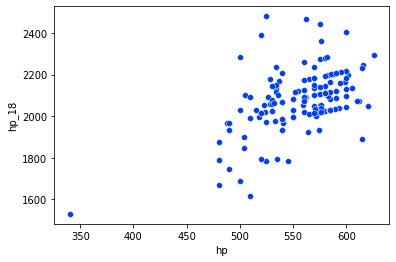

In [70]:
sns.scatterplot(data = champ_stats, x = 'hp', y ='hp_18')
# . set_xlin(450, 650)

Text(129    343.0
Name: hp, dtype: float64, 129    1533.0
Name: hp_18, dtype: float64, 'Kled')

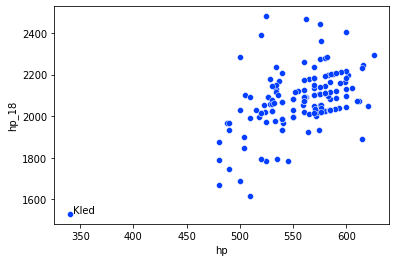

In [84]:
#scatter plot에 모든 챔피언 이름 새기기
sns.scatterplot(data = champ_stats, x = 'hp', y = 'hp_18')
plt.text(x = champ_stats[champ_stats['championName'] == 'Kled']['hp'] +3,
         y = champ_stats[champ_stats['championName'] == 'Kled']['hp_18'] + 3,
         s = 'Kled')

In [74]:
champ_stats['championName']

0            Annie
1             Olaf
2            Galio
3      TwistedFate
4          XinZhao
          ...     
151           Pyke
152           Yone
153           Sett
154         Lillia
155           Gwen
Name: championName, Length: 156, dtype: object

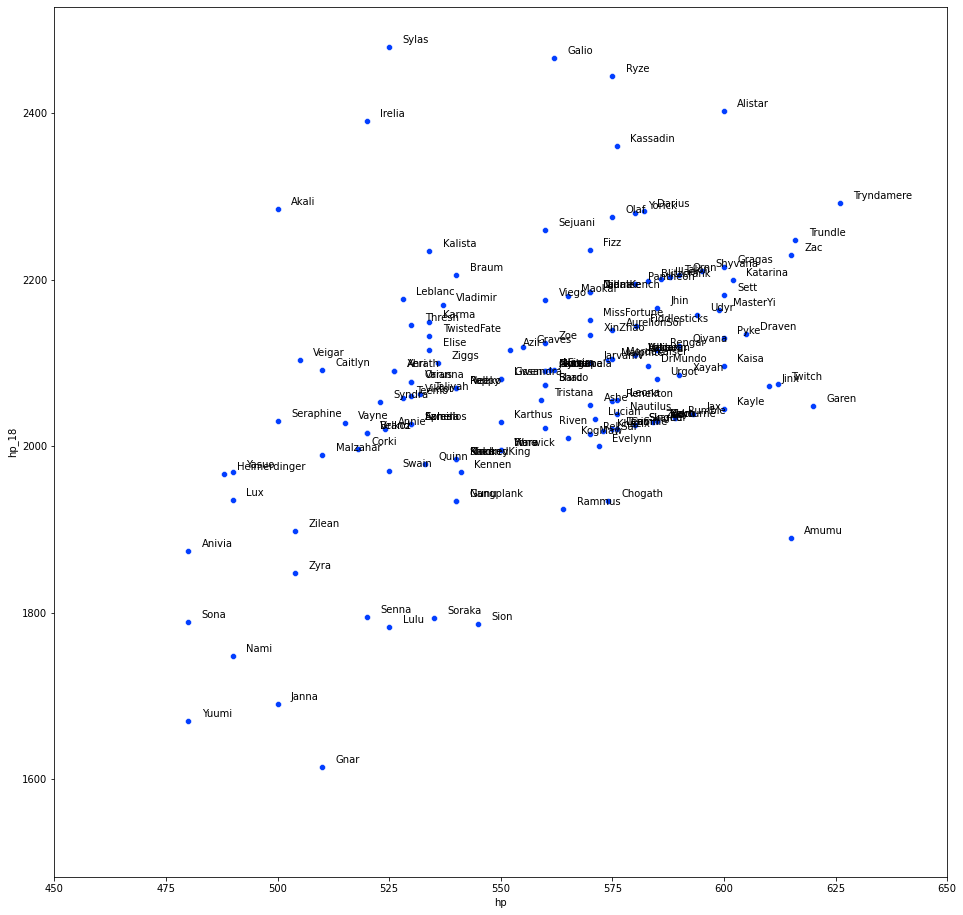

In [97]:
plt.figure(figsize = (16, 16))
sns.scatterplot(data = champ_stats, x = 'hp', y = 'hp_18').set_xlim(450, 650)
for name in champ_stats['championName']:
    if name =='Kled':
        continue
  
    plt.text(x = champ_stats[champ_stats['championName'] == name]['hp'] +3,
        y = champ_stats[champ_stats['championName'] == name]['hp_18'] + 5,
        s = name)


In [104]:
list(data)

['gameId',
 'createDate',
 'tierRank',
 'position',
 'teamId',
 'summonerId',
 'championId',
 'result',
 'level',
 'championsKilled',
 'numDeaths',
 'assists',
 'neutralMinionsKilled',
 'turretsKilled',
 'barracksKilled',
 'minionsKilled',
 'goldEarned',
 'physicalDamageDealtToChampions',
 'magicDamageDealtPlayer',
 'physicalDamageTaken',
 'sightWardsBoughtInGame',
 'visionWardsBoughtInGame',
 'wardKilled',
 'wardPlaced',
 'totalHeal',
 'totalDamageDealtToChampions',
 'totalDamageDealt',
 'totalDamageTaken',
 'neutralMinionsKilledEnemyJungle',
 'neutralMinionsKilledTeamJungle',
 'visionScore',
 'damageSelfMitigated',
 'damageDealtToObjectives',
 'damageDealtToTurrets',
 'lane',
 'gameLength',
 'version']

In [109]:
new_data = data[['wardPlaced', 'result']]

In [129]:
new_data

,wardPlaced,result
0,5,WIN
1,6,LOSE
2,7,WIN
3,5,WIN
4,5,WIN
...,...,...
999995,29,WIN
999996,8,WIN
999997,13,LOSE
999998,11,WIN


In [229]:
new_data.groupby('wardPlaced').size()

wardPlaced
0      17999
1      25812
2      37183
3      58541
4      78367
       ...  
163        1
173        1
190        1
194        1
226        1
Length: 127, dtype: int64

In [ ]:
font_label = {'color' : 'blue',
              'weight' : 'bold'}
font_title = {'family':'serif',
              'size': 20, 
              # 'backgroundcolor'='black'
             'color':'brown',
              'weight':'bold', 
              'verticalalignment':'baseline', 
              'horizontalalignment':'center'}
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = data, x ='wardPlaced', y ='Winrate')

###
damage_mean = group1_10['totalDamageDealtToChampions'].mean()
ax.axvline(damage_mean, ls = 'dotted', lw =3, color = 'green')
arrowprops = {'arrowstyle' : '->'}
ax.annotate('average', (damage_mean, 2.5),
           xytext = (17000, 2.5), color='green',
           fontfamily = 'serif', fontstyle = 'italic',
           fontsize = 15, arrowprops = arrowprops)
###
ax.set_xlabel('Avg damage', fontdict = font_label, labelpad= 20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad=100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)